# Steps to Perform Logistic Regression

## Import Libraries

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

## Prepare the Data

In [33]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Reduce Input Features

In [35]:
# Reduce features to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Split data into training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

## Train The Model

In [39]:
# Initialize the model
model = LogisticRegression(max_iter=2000)  # max_iter is increased for convergence

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Make Prediction

In [41]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)
print("y Test: ",y_test.to_numpy())
print("y Predict: ",y_pred)
print("y Predict_Probability: ",y_pred_proba)

y Test:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
y Predict:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
y Predict_Probability:  [6.93937902e-01 2.20303902e-07 3.81898447e-03 9.86906614e-01
 9.89319997e-01 6.55548330e-06 2.42401540e-08 2.63761490e-02
 9.50161263e-01 8.73246252e-01 9.44616573e-01 3.77465049e-03
 8.86473802e-01 4.92249257e-01 9.61011846e-01 1.02860304e-01
 9.16561516e-01

## Evaluate the Model

In [44]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029
Confusion Matrix:
 [[ 60   3]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## Visualize the Result

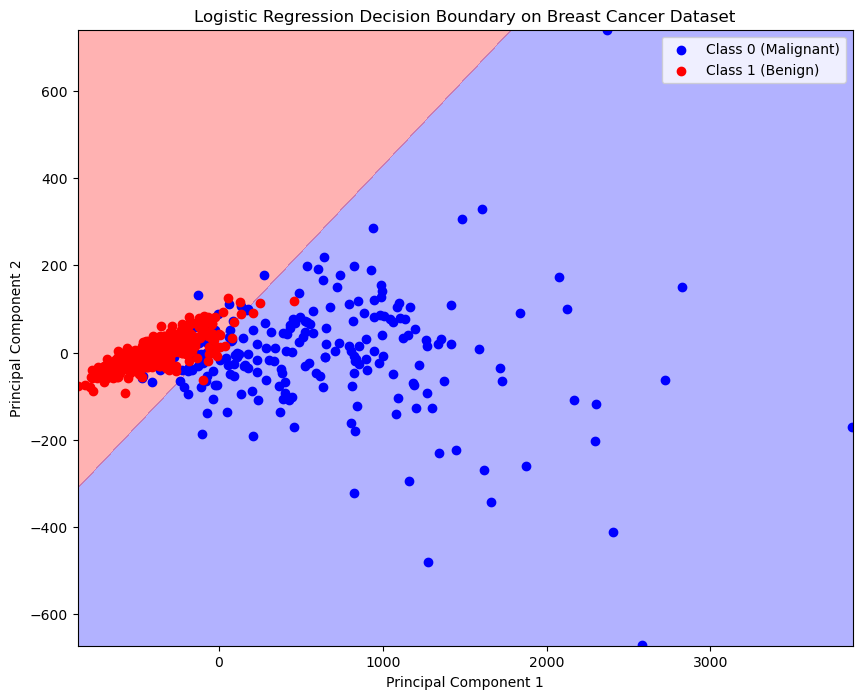

In [46]:
# Visualize decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for grid points
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=["blue", "red"], alpha=0.3)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color="blue", label="Class 0 (Malignant)")
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color="red", label="Class 1 (Benign)")
plt.title("Logistic Regression Decision Boundary on Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()